<a href="https://colab.research.google.com/github/AmritaSarkar99/PYTHON/blob/main/TECHNICAL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TECHNICAL ANALYSIS

In [89]:
from datetime import datetime
import pytz
print('Tested on ',datetime.now(pytz.timezone('Asia/Calcutta')))
!python --version
!lsb_release -a

Tested on  2025-11-17 19:28:37.732479+05:30
Python 3.12.12
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
!wget -O TATACOMM.csv 'https://raw.githubusercontent.com/AmritaSarkar99/PYTHON/main/17-11-2024-TO-17-11-2025-TATACOMM-ALL-N.csv'
!wget -O RELIANCE.csv 'https://raw.githubusercontent.com/AmritaSarkar99/PYTHON/main/17-11-2024-TO-17-11-2025-RELIANCE-ALL-N.csv'

--2025-11-17 13:58:38--  https://raw.githubusercontent.com/AmritaSarkar99/PYTHON/main/17-11-2024-TO-17-11-2025-TATACOMM-ALL-N.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41010 (40K) [text/plain]
Saving to: ‘TATACOMM.csv’

TATACOMM.csv        100%[===================>]  40.05K  --.-KB/s    in 0.002s  

2025-11-17 13:58:38 (20.7 MB/s) - ‘TATACOMM.csv’ saved [41010/41010]

--2025-11-17 13:58:38--  https://raw.githubusercontent.com/AmritaSarkar99/PYTHON/main/17-11-2024-TO-17-11-2025-RELIANCE-ALL-N.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting resp

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
dfchk = pd.read_csv('TATACOMM.csv', delimiter = ',')
#dfchk = pd.read_csv(nseData, delimiter = ',')
dfchk.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover ₹,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TATACOMM,EQ,18-Nov-2024,"1,749.90","1,749.90","1,755.80","1,715.20","1,727.25","1,727.35","1,728.01","2,27,643","39,33,69,356.10","19,911","1,41,767",62.28
1,TATACOMM,EQ,19-Nov-2024,"1,727.35","1,727.25","1,773.00","1,721.00","1,730.60","1,736.70","1,748.05","1,62,668","28,43,52,040.80","21,210","59,546",36.61
2,TATACOMM,EQ,21-Nov-2024,"1,736.70","1,725.05","1,733.85","1,699.25","1,710.00","1,711.55","1,714.03","1,26,914","21,75,34,833.00","13,283","50,432",39.74


In [94]:
dfchk.columns

Index(['Symbol  ', 'Series  ', 'Date  ', 'Prev Close  ', 'Open Price  ',
       'High Price  ', 'Low Price  ', 'Last Price  ', 'Close Price  ',
       'Average Price ', 'Total Traded Quantity  ', 'Turnover ₹  ',
       'No. of Trades  ', 'Deliverable Qty  ', '% Dly Qt to Traded Qty  '],
      dtype='object')

In [95]:
dropCols = ['Series  ',  'Prev Close  ', 'Last Price  ', 'Average Price ', 'Total Traded Quantity  ', 'Deliverable Qty  ', '% Dly Qt to Traded Qty  ','Turnover ₹  '  ]
#drop_cols = ['Symbol', 'Series', 'Date', 'Prev Close',  'Last Price',   'Total Traded Quantity']
dfchk.drop(dropCols,axis=1,inplace=True)

In [96]:
dfchk.columns

Index(['Symbol  ', 'Date  ', 'Open Price  ', 'High Price  ', 'Low Price  ',
       'Close Price  ', 'No. of Trades  '],
      dtype='object')

In [97]:
dfchk.rename(columns={'Date  ':'Date','Open Price  ':'OPEN','High Price  ':'HIGH','Low Price  ':'LOW','Close Price  ':'CLOSE','No. of Trades  ':'VOLUME'}, inplace=True)
dfchk.head(3)

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,TATACOMM,18-Nov-2024,"1,749.90","1,755.80","1,715.20","1,727.35","19,911"
1,TATACOMM,19-Nov-2024,"1,727.25","1,773.00","1,721.00","1,736.70","21,210"
2,TATACOMM,21-Nov-2024,"1,725.05","1,733.85","1,699.25","1,711.55","13,283"


In [98]:
#dfchk.plot(kind='line',x='Date',y='OPEN') #no numeric data is available

In [99]:
dfchk.dtypes

,0
Symbol,object
Date,object
OPEN,object
HIGH,object
LOW,object
CLOSE,object
VOLUME,object


In [100]:
x = dfchk.OPEN.dtypes
print(x)

object


In [101]:
if (dfchk.OPEN.dtypes == 'object'):
    print('string')
if (dfchk.OPEN.dtypes == 'float64'):
    print('numeric')

string


In [102]:
dfchk['Date'] = pd.to_datetime(dfchk['Date'],format='%d-%b-%Y')
if (dfchk.OPEN.dtypes == 'object'):
    dfchk['OPEN'] = pd.to_numeric(dfchk['OPEN'].str.replace(',', ''))
if (dfchk.HIGH.dtypes == 'object'):
    dfchk['HIGH'] = pd.to_numeric(dfchk['HIGH'].str.replace(',', ''))
if (dfchk.LOW.dtypes == 'object'):
    dfchk['LOW'] = pd.to_numeric(dfchk['LOW'].str.replace(',', ''))
if (dfchk.CLOSE.dtypes == 'object'):
    dfchk['CLOSE'] = pd.to_numeric(dfchk['CLOSE'].str.replace(',', ''))
if (dfchk.VOLUME.dtypes == 'object'):
    dfchk['VOLUME'] = pd.to_numeric(dfchk['VOLUME'].str.replace(',', ''))
dfchk.head(3)

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,TATACOMM,2024-11-18,1749.90,1755.80,1715.20,1727.35,19911
1,TATACOMM,2024-11-19,1727.25,1773.00,1721.00,1736.70,21210
2,TATACOMM,2024-11-21,1725.05,1733.85,1699.25,1711.55,13283


In [103]:
dfchk.dtypes

,0
Symbol,object
Date,datetime64[ns]
OPEN,float64
HIGH,float64
LOW,float64
CLOSE,float64
VOLUME,int64


<Axes: xlabel='Date'>

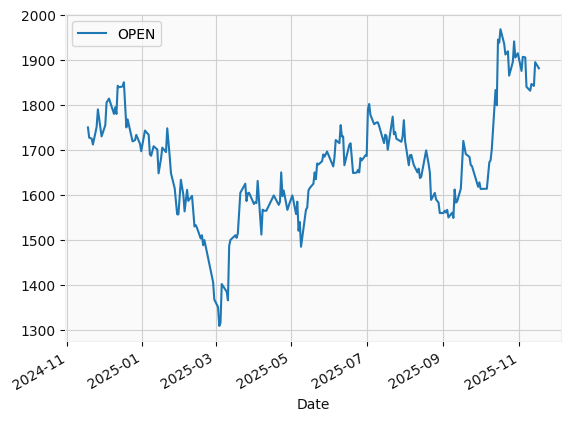

In [104]:
dfchk.plot(kind='line',x='Date',y='OPEN')

In [105]:
dfchk = dfchk.sort_values('Date')
dfchk.head()

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,TATACOMM,2024-11-18,1749.90,1755.80,1715.20,1727.35,19911
1,TATACOMM,2024-11-19,1727.25,1773.00,1721.00,1736.70,21210
2,TATACOMM,2024-11-21,1725.05,1733.85,1699.25,1711.55,13283
3,TATACOMM,2024-11-22,1712.00,1744.75,1701.00,1738.15,18840
4,TATACOMM,2024-11-25,1751.00,1791.20,1751.00,1784.10,29416


In [106]:
def formatNSEdata(csvfile):
    df = pd.read_csv(csvfile, delimiter = ',')
    dropCols = ['Series  ',  'Prev Close  ', 'Last Price  ', 'Average Price ', 'Total Traded Quantity  ', 'Deliverable Qty  ', '% Dly Qt to Traded Qty  ','Turnover ₹  '  ]
    df.drop(dropCols,axis=1,inplace=True)
    df.rename(columns={'Date  ':'Date','Open Price  ':'OPEN','High Price  ':'HIGH','Low Price  ':'LOW','Close Price  ':'CLOSE','No. of Trades  ':'VOLUME'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'],format='%d-%b-%Y')
    if (df.OPEN.dtypes == 'object'):
        df['OPEN'] = pd.to_numeric(df['OPEN'].str.replace(',', ''))
    if (df.HIGH.dtypes == 'object'):
        df['HIGH'] = pd.to_numeric(df['HIGH'].str.replace(',', ''))
    if (df.LOW.dtypes == 'object'):
        df['LOW'] = pd.to_numeric(df['LOW'].str.replace(',', ''))
    if (df.CLOSE.dtypes == 'object'):
        df['CLOSE'] = pd.to_numeric(df['CLOSE'].str.replace(',', ''))
    if (df.VOLUME.dtypes == 'object'):
        df['VOLUME'] = pd.to_numeric(df['VOLUME'].str.replace(',', ''))
    df = df.sort_values('Date')
    return df

In [107]:
dfTATACOMM = formatNSEdata('TATACOMM.csv')
dfTATACOMM.head()

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,TATACOMM,2024-11-18,1749.90,1755.80,1715.20,1727.35,19911
1,TATACOMM,2024-11-19,1727.25,1773.00,1721.00,1736.70,21210
2,TATACOMM,2024-11-21,1725.05,1733.85,1699.25,1711.55,13283
3,TATACOMM,2024-11-22,1712.00,1744.75,1701.00,1738.15,18840
4,TATACOMM,2024-11-25,1751.00,1791.20,1751.00,1784.10,29416


In [108]:
dfRELIANCE = formatNSEdata('RELIANCE.csv')
dfRELIANCE.head()

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,RELIANCE,2024-11-18,1267.60,1272.90,1243.90,1260.75,301906
1,RELIANCE,2024-11-19,1260.75,1281.50,1235.15,1241.65,355649
2,RELIANCE,2024-11-21,1241.65,1243.95,1217.25,1223.00,553410
3,RELIANCE,2024-11-22,1229.40,1268.85,1222.45,1265.40,323219
4,RELIANCE,2024-11-25,1290.00,1304.45,1282.45,1287.00,390544


# ONE COMPANY DATA

In [109]:
#Number of trading days / data points
dfRELIANCE.count()

,0
Symbol,254
Date,254
OPEN,254
HIGH,254
LOW,254
CLOSE,254
VOLUME,254


<Axes: xlabel='Date'>

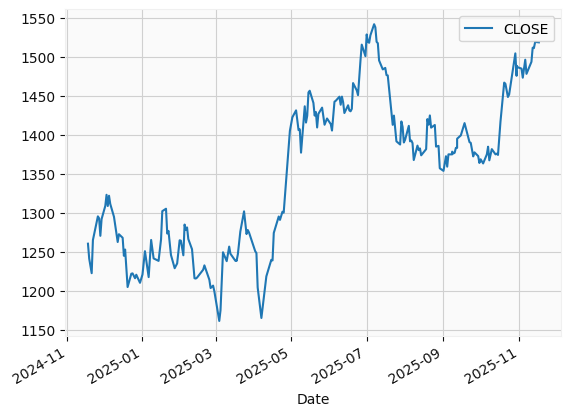

In [110]:
dfRELIANCE.plot(kind='line',x='Date',y='CLOSE')

In [111]:
startDate = dfRELIANCE['Date'][dfRELIANCE.index[0]]
endDate = dfRELIANCE['Date'][dfRELIANCE.index[-1]]
print(startDate,endDate)

2024-11-18 00:00:00 2025-11-17 00:00:00


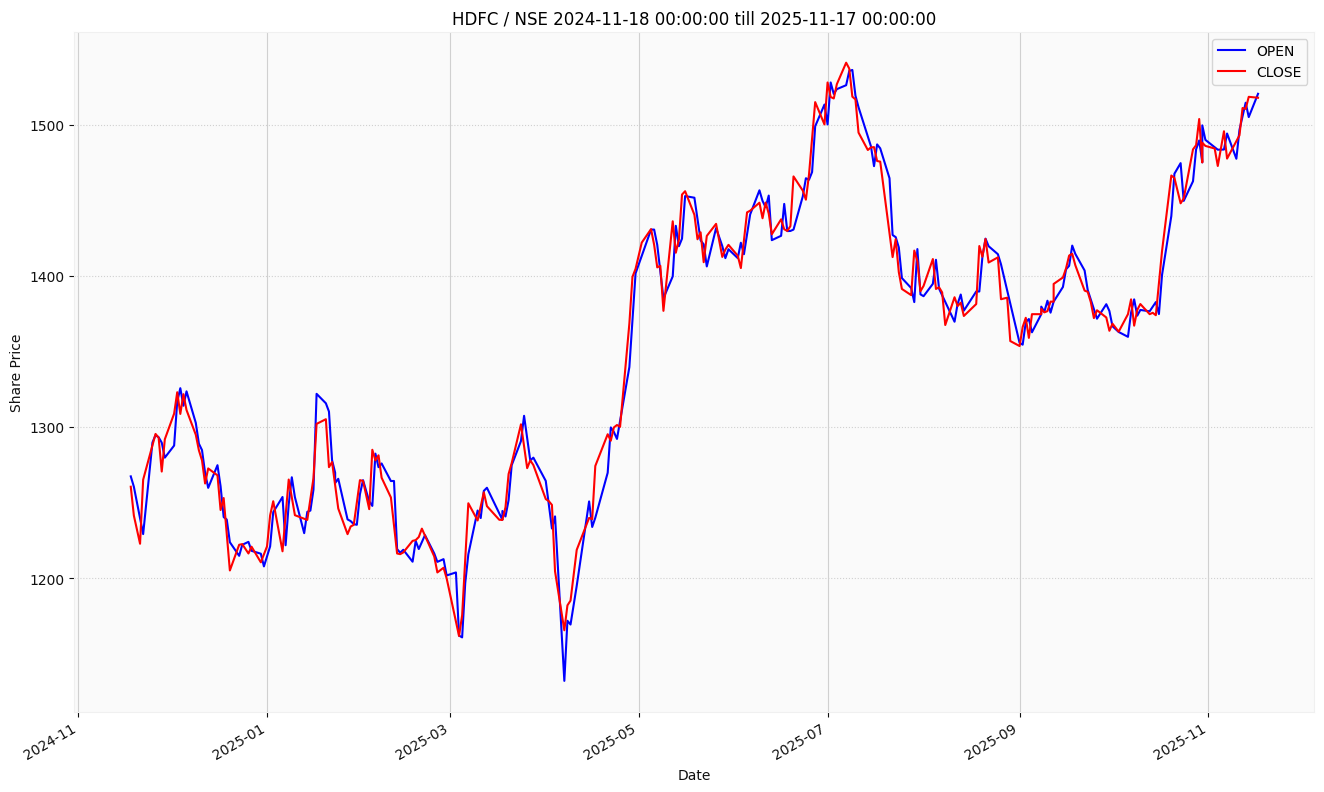

In [112]:
# Plotting directly from DataFrames with Pandas
dfRELIANCE.plot(
    x='Date',
    y=['OPEN', 'CLOSE'],
    kind='line',
    legend=False,
    color=['blue','red'],
    figsize=(16,10)

)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("HDFC / NSE "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

# COMPARE 2 COMPANIES

In [113]:
dfRELIANCE = formatNSEdata('RELIANCE.csv')
dfTATACOMM = formatNSEdata('TATACOMM.csv')

In [114]:
dfRELIANCE = formatNSEdata('RELIANCE.csv')
dfRELIANCE.head(2)

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,RELIANCE,2024-11-18,1267.60,1272.9,1243.90,1260.75,301906
1,RELIANCE,2024-11-19,1260.75,1281.5,1235.15,1241.65,355649


In [115]:
dfTATACOMM = formatNSEdata('TATACOMM.csv')
dfTATACOMM.head(2)

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,TATACOMM,2024-11-18,1749.90,1755.8,1715.2,1727.35,19911
1,TATACOMM,2024-11-19,1727.25,1773.0,1721.0,1736.70,21210


In [116]:
df2Com = pd.merge(dfRELIANCE[['Date','CLOSE']],dfTATACOMM[['Date','CLOSE']],on='Date')
df2Com.head(2)

,Date,CLOSE_x,CLOSE_y
0,2024-11-18,1260.75,1727.35
1,2024-11-19,1241.65,1736.70


In [117]:
df2Com = df2Com.rename(columns ={'CLOSE_x':'RELIANCE','CLOSE_y':'TATACOMM'})
df2Com.head(2)

,Date,RELIANCE,TATACOMM
0,2024-11-18,1260.75,1727.35
1,2024-11-19,1241.65,1736.70


In [118]:
startDate = df2Com['Date'][df2Com.index[0]]
endDate = df2Com['Date'][df2Com.index[-1]]
print(startDate,endDate)

2024-11-18 00:00:00 2025-11-17 00:00:00


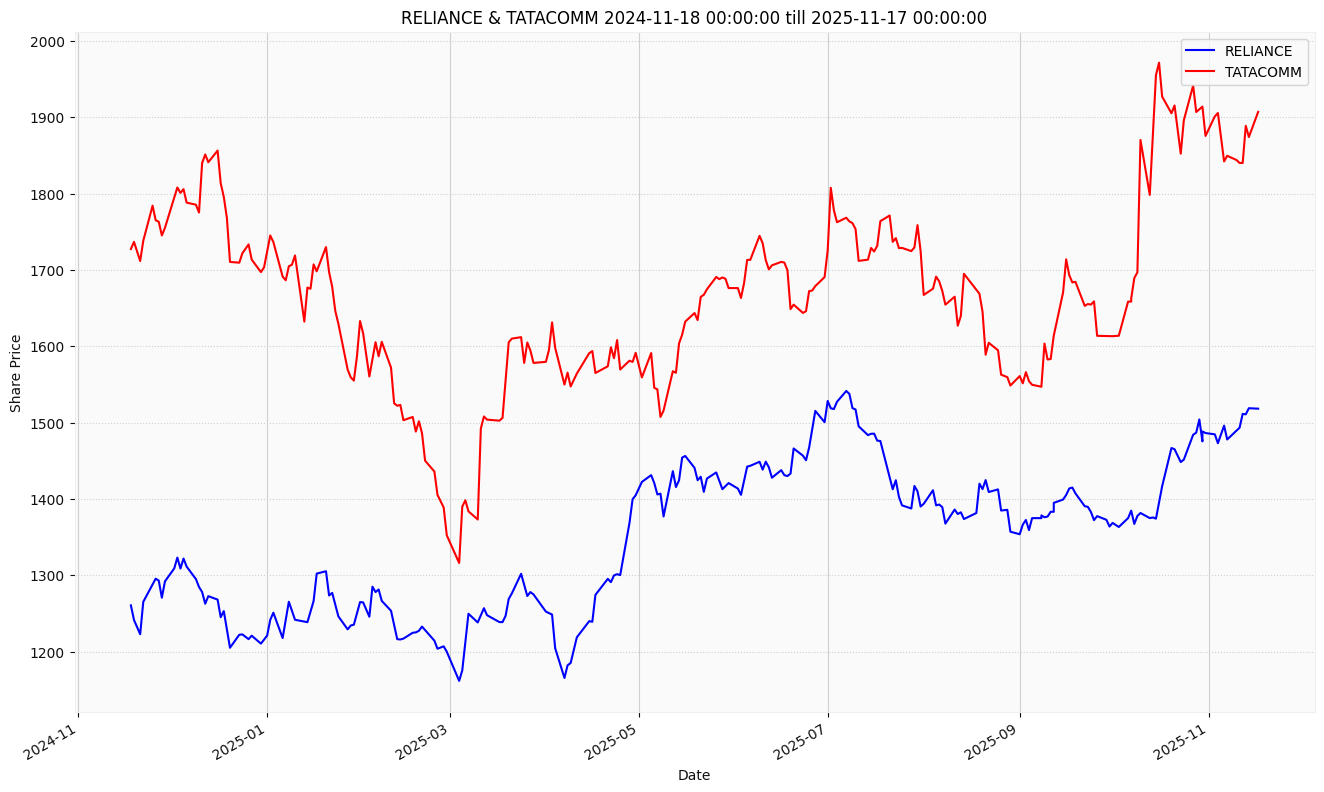

In [119]:
df2Com.plot(
    x='Date',
    y=['RELIANCE', 'TATACOMM'],
    kind='line',
    legend=False,
    color=['blue','red'],
    figsize=(16,10)

)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("RELIANCE & TATACOMM "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

#Scaling the Data

In [120]:
df = df2Com.copy()
df.head()

,Date,RELIANCE,TATACOMM
0,2024-11-18,1260.75,1727.35
1,2024-11-19,1241.65,1736.70
2,2024-11-21,1223.00,1711.55
3,2024-11-22,1265.40,1738.15
4,2024-11-25,1287.00,1784.10


In [121]:
df['RELIANCE'] = df['RELIANCE']/df['RELIANCE'][0]
df['TATACOMM'] = df['TATACOMM']/df['TATACOMM'][0]
df.head(10)

,Date,RELIANCE,TATACOMM
0,2024-11-18,1.000000,1.000000
1,2024-11-19,0.984850,1.005413
2,2024-11-21,0.970058,0.990853
3,2024-11-22,1.003688,1.006252
4,2024-11-25,1.020821,1.032854
5,2024-11-26,1.027722,1.021825
6,2024-11-27,1.025739,1.020639
7,2024-11-28,1.007971,1.010276
8,2024-11-29,1.024945,1.016065
9,2024-12-02,1.038390,1.037514


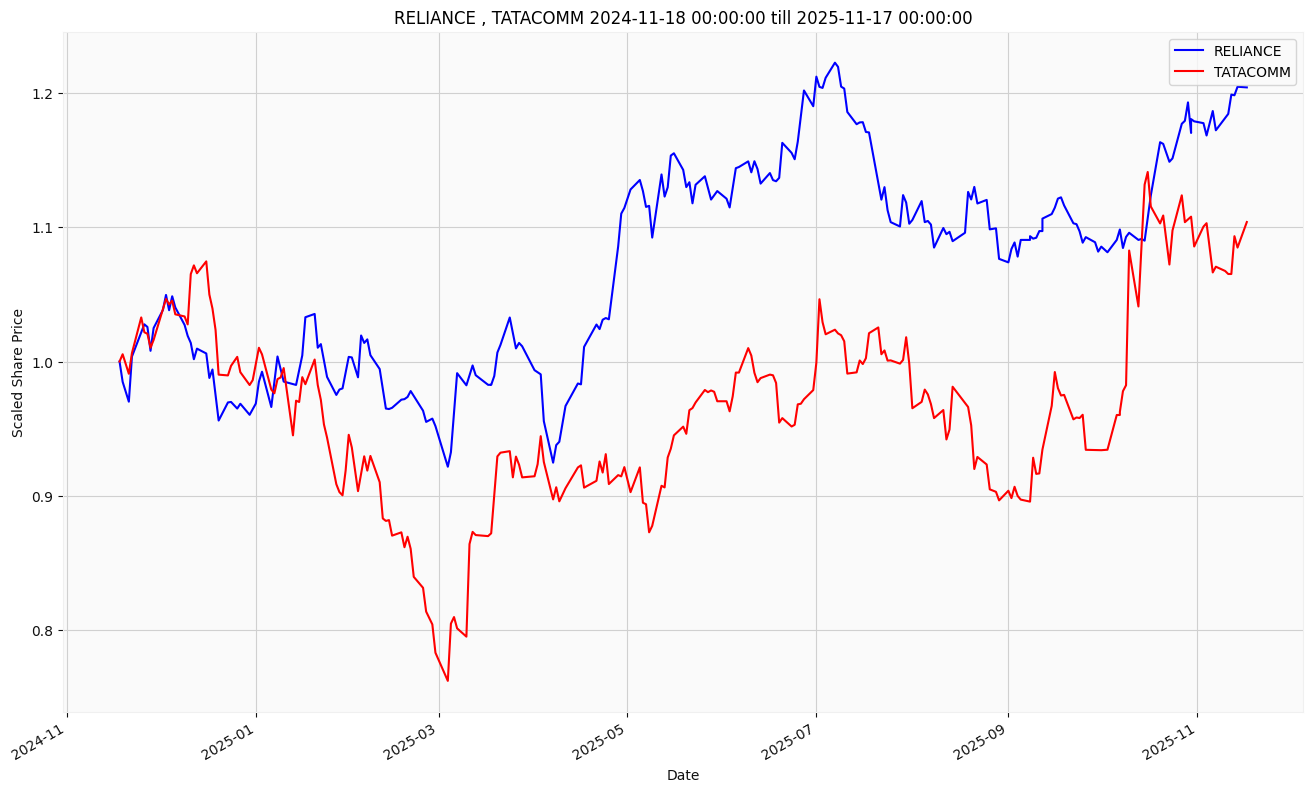

In [122]:
# Plotting directly from DataFrames with Pandas
df.plot(
    x='Date',
    y=['RELIANCE', 'TATACOMM'],
    kind='line',
    legend=False,
    color=['blue','red', 'green'],
    figsize=(16,10)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Scaled Share Price')
plt.xlabel("Date")
plt.title("RELIANCE , TATACOMM "+str(startDate)+" till "+str(endDate))
plt.legend()

In [123]:
df = formatNSEdata('RELIANCE.csv')
df.head(2)

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,RELIANCE,2024-11-18,1267.60,1272.9,1243.90,1260.75,301906
1,RELIANCE,2024-11-19,1260.75,1281.5,1235.15,1241.65,355649


In [124]:
df.set_index('Date',inplace=True)
df.head(3)

,Symbol,OPEN,HIGH,LOW,CLOSE,VOLUME
Date,,,,,,
2024-11-18,RELIANCE,1267.60,1272.90,1243.90,1260.75,301906
2024-11-19,RELIANCE,1260.75,1281.50,1235.15,1241.65,355649
2024-11-21,RELIANCE,1241.65,1243.95,1217.25,1223.00,553410


In [125]:
df.tail(3)

,Symbol,OPEN,HIGH,LOW,CLOSE,VOLUME
Date,,,,,,
2025-11-13,RELIANCE,1515.0,1522.1,1506.8,1510.9,209774
2025-11-14,RELIANCE,1505.5,1520.9,1505.5,1518.9,194941
2025-11-17,RELIANCE,1520.9,1523.7,1511.5,1518.3,123473


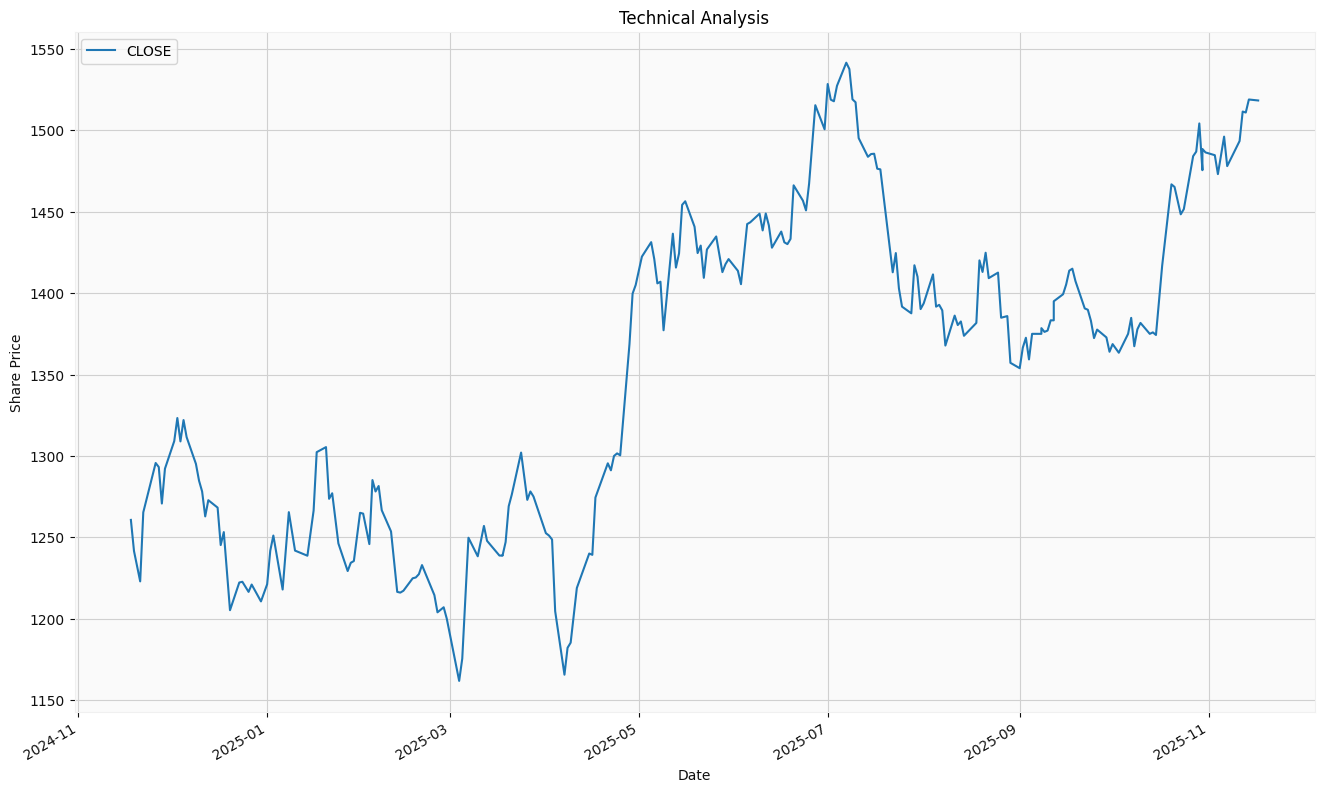

In [126]:
df.plot(y='CLOSE', figsize=(16,10))

plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Technical Analysis")
plt.legend(loc='upper left')

In [127]:
df['SMA10'] = df['CLOSE'].rolling(10).mean()
df['SMA30'] = df['CLOSE'].rolling(30).mean()
#df.tail()
#df.head(40)
df.count()

,0
Symbol,254
OPEN,254
HIGH,254
LOW,254
CLOSE,254
VOLUME,254
SMA10,245
SMA30,225


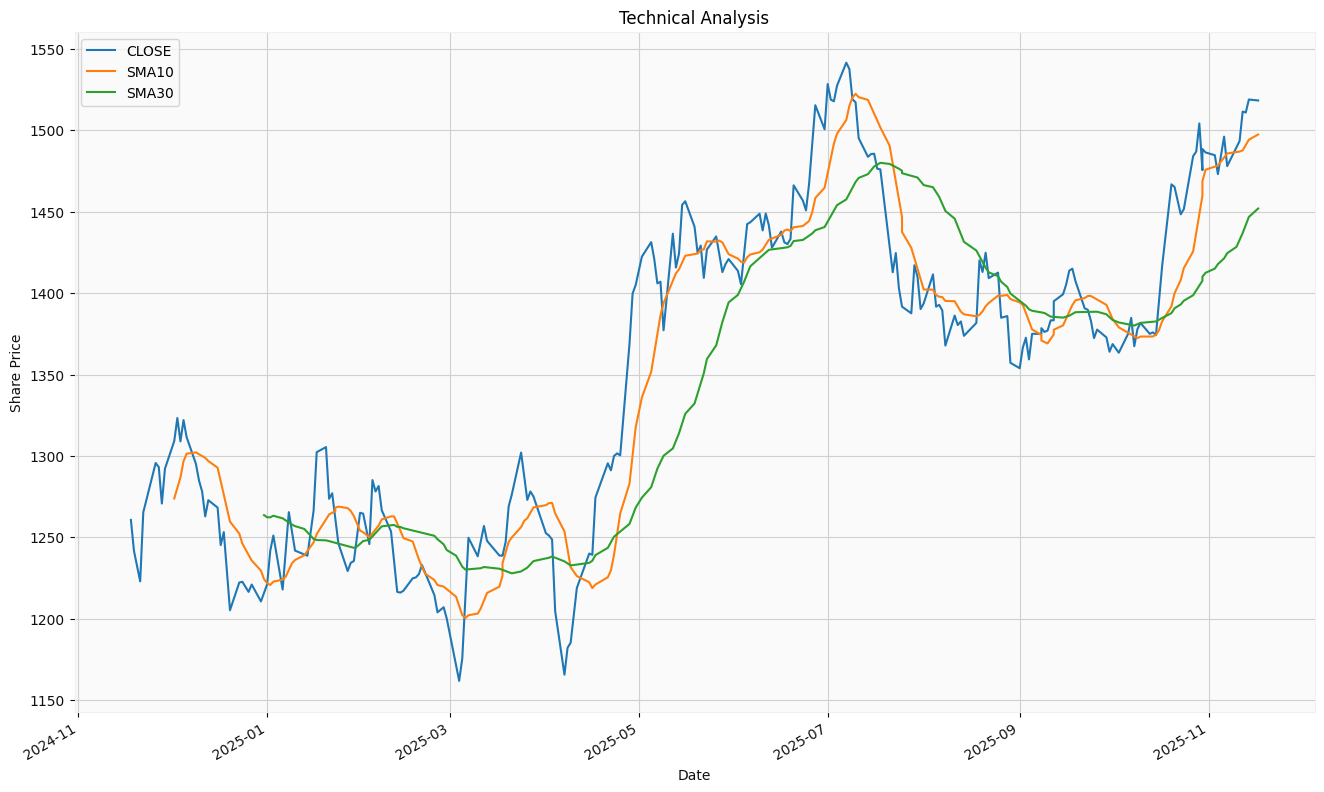

In [128]:
df.plot(y=['CLOSE','SMA10','SMA30'],
        figsize=(16,10))

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Technical Analysis")
plt.legend(loc='upper left')

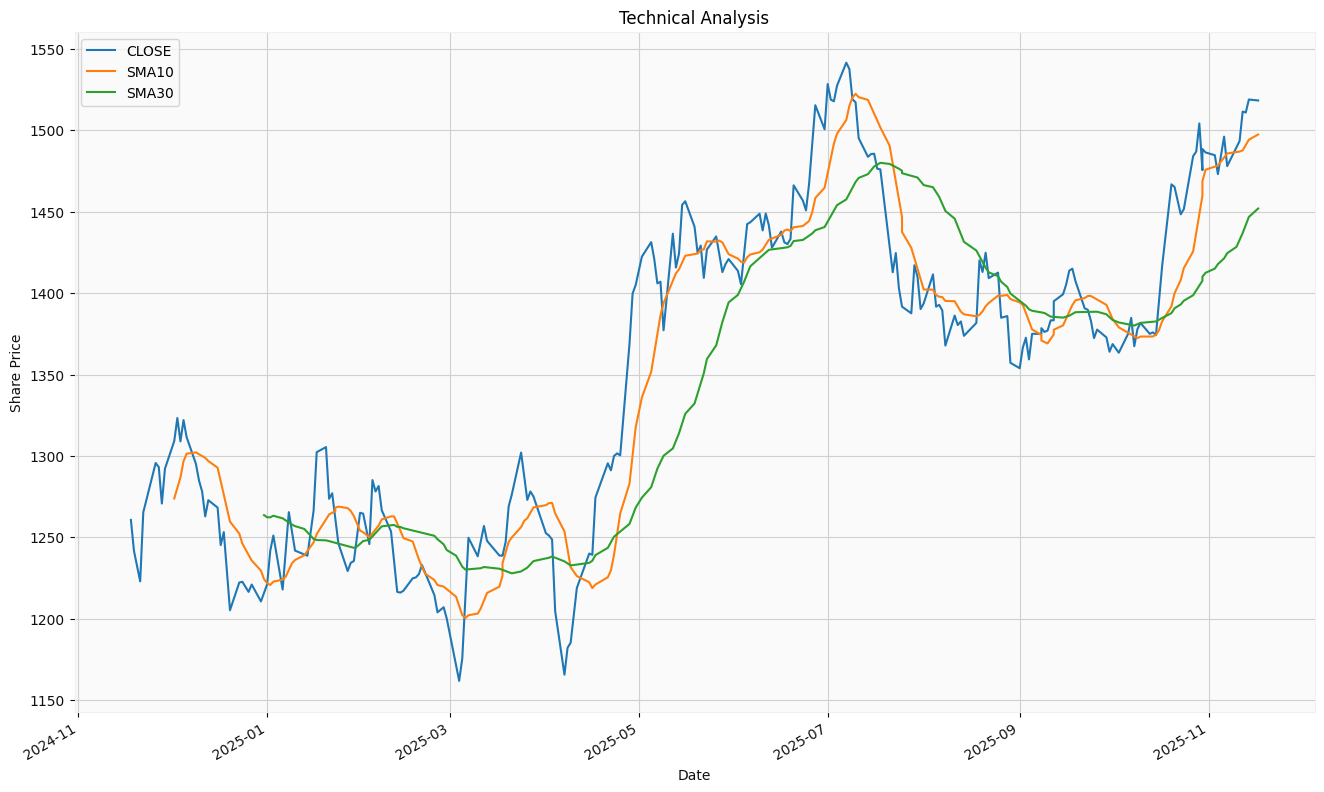

In [129]:
df.plot(y=['CLOSE','SMA10','SMA30'],
        figsize=(16,10))

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Technical Analysis")
plt.legend(loc='upper left')

# Technical Charts

In [130]:
!pip install mplfinance > /dev/null
import mplfinance as mpf

In [131]:
df = formatNSEdata('RELIANCE.csv')
df.head(2)

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,RELIANCE,2024-11-18,1267.60,1272.9,1243.90,1260.75,301906
1,RELIANCE,2024-11-19,1260.75,1281.5,1235.15,1241.65,355649


In [132]:
df.set_index('Date',inplace=True)
df.head(3)

,Symbol,OPEN,HIGH,LOW,CLOSE,VOLUME
Date,,,,,,
2024-11-18,RELIANCE,1267.60,1272.90,1243.90,1260.75,301906
2024-11-19,RELIANCE,1260.75,1281.50,1235.15,1241.65,355649
2024-11-21,RELIANCE,1241.65,1243.95,1217.25,1223.00,553410


In [133]:
df.rename(columns={'Date ':'Date','OPEN':'Open','HIGH':'High','LOW':'Low','CLOSE':'Close','VOLUME':'Volume'}, inplace=True)

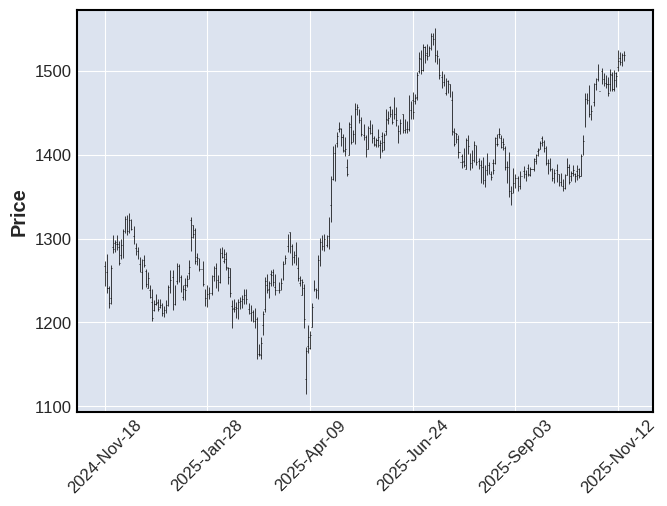

In [134]:
mpf.plot(df)

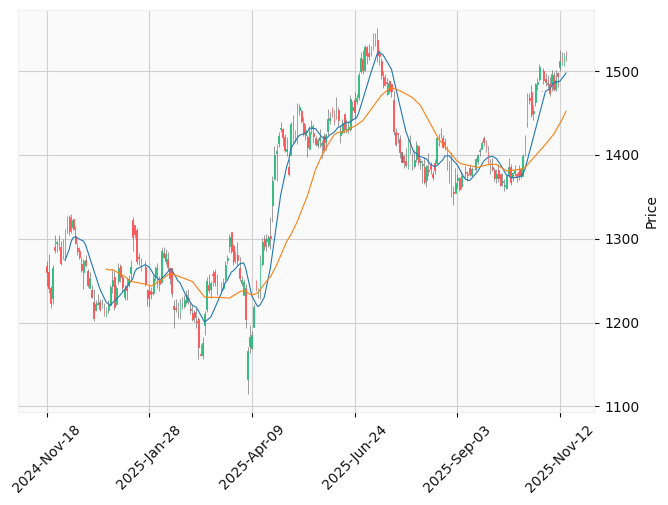

In [135]:
mpf.plot(df, type='candle',mav=(10,30), style='yahoo')

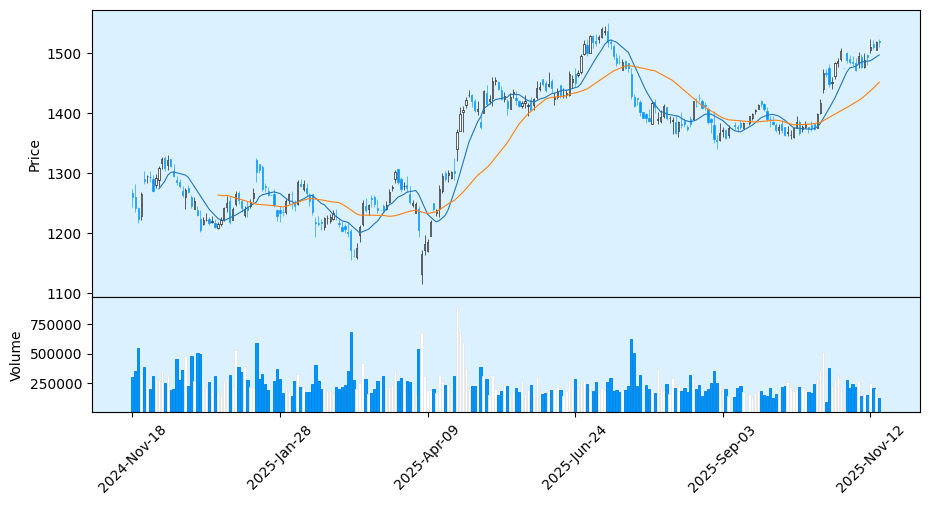

In [136]:
mpf.plot(df, type='candle',mav=(10,30), style='blueskies', volume=True,figratio=(20,10))

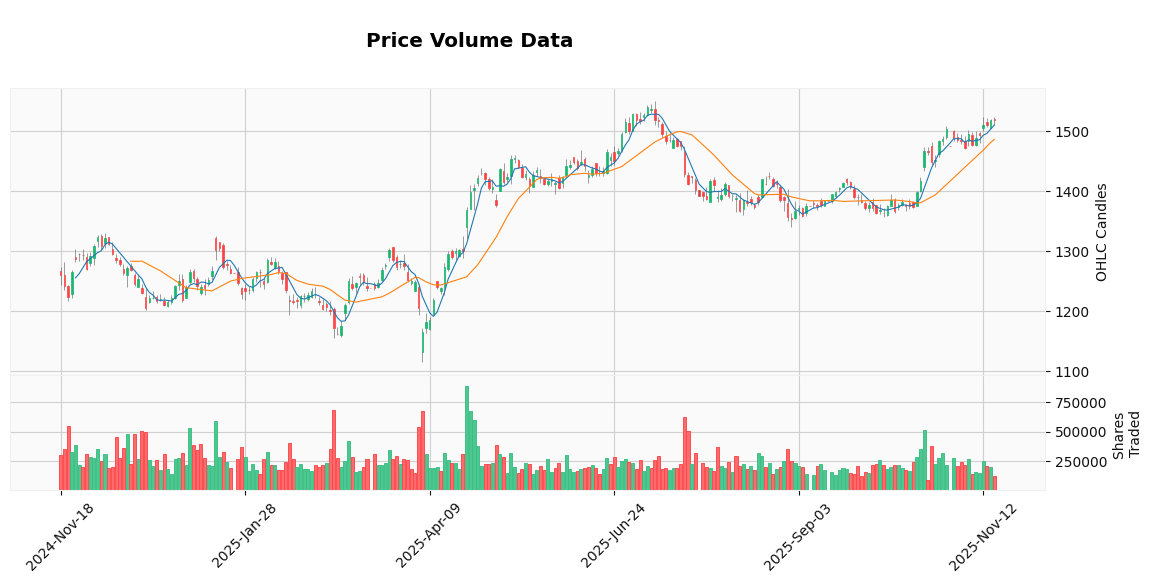

In [137]:
mpf.plot(df, type='candle',
         style='yahoo',
         mav=(5,20),
         volume=True,
         figratio=(30,12),
         title='\nPrice Volume Data',
         ylabel='OHLC Candles',
         ylabel_lower='Shares \nTraded')